## Final Notebook
### Introduction
When trying to find the "best neighborhood" in Pittsburgh, our group decided upon safety as our metric. We all agreed that safety is a vital component to the quality of a neighborhood. 

### The Metric
Specifically for our metrics, we decided to look at non-traffic citations, firearm seizures, and monthly criminal activity. Before landing upon these metrics, some other metrics we were considering were air quality, landslide-prone areas, and fire incidents.

### The Best Neighborhood
According to all of our metrics combined, we decided that Chartiers is the best neighborhood. Chartiers has the lowest monthly average crime rate and thirtd-lowest total crimes reported since 2024. There has also been no firearm seizure incidents, and it's one of the few neighborhoods with the lowest amount of non-traffic citations. 

### Conclusion
**Abigail:**
If I were to look solely at my submetric, non-traffic citations, the "safest" neighborhoods would be Mt. Oliver Boro, Chartiers City, and St. Clair. Based on the data found and shown in my graph, these three neighborhoods have only had 3 non-traffic citations in the past 9 years. This represents an exceptionally low level of disorderly conduct, noise complaints, and other non-traffic offenses over the years.

The data-driven determination of the "best neighborhood" is different from my personal favorite neighborhood, Shadyside, which has a large number of citations. Despite it being less "safe," I love to go to Shadyside as a fun weekend outing, whether it's to eat, shop, or just walk around.

**AJ:**
The data driven determination of the "best neighborhood" is completely different from my personal favorite neighborhood, the Strip District, despite the numerous amount of crimes reported there. Even though Chartiers is "safer," I've never heard or ever been there compared to Strip District which has all the shops I love going to, it's nice to walk around in, and I have extended family that live close to it. 

**Lakshya:**
the data-driven determination of the "best neighborhood" is different from my personal favorite neighborhood. My favorite neighborhood is North Shore, which actually has had a higher number of firearm seizures compared to other neighborhoods. They have had 20 incidents of gun seizures, therefore being labeled as unsafe according to my analyzation. However, I have been here a couple of times and I haven't felt that unsafe. I don't think you can generalize an entire neighborhood as unsafe based off of one factor.

## Non-Traffic citations
### By Abigail Huang
I'm measuring safety by looking at non-traffic citations such as disorderly conduct, public drunkenness, noise violations, etc. The **fewer** citations the neighborhood has, the **safer** the neighborhood is! I chose this metric because police citations are a major contributor to whether or not a neighborhood is safe.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
citations = pd.read_csv("data/non_traffic_citations.csv")
print("Total Citations:", len(citations))
print("Neighborhoods Covered:", citations['NEIGHBORHOOD'].nunique())

Total Citations: 16295
Neighborhoods Covered: 97


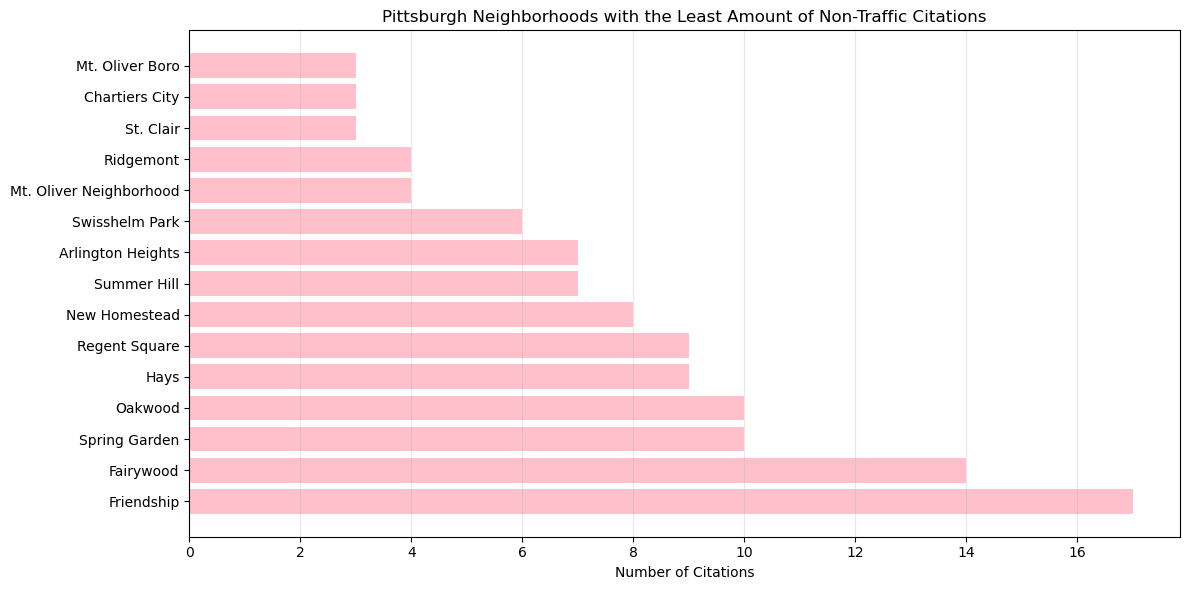

Top 15 Safest Neighborhoods:
1. Mt. Oliver Boro: 3 citations
2. Chartiers City: 3 citations
3. St. Clair: 3 citations
4. Ridgemont: 4 citations
5. Mt. Oliver Neighborhood: 4 citations
6. Swisshelm Park: 6 citations
7. Arlington Heights: 7 citations
8. Summer Hill: 7 citations
9. New Homestead: 8 citations
10. Regent Square: 9 citations
11. Hays: 9 citations
12. Oakwood: 10 citations
13. Spring Garden: 10 citations
14. Fairywood: 14 citations
15. Friendship: 17 citations


In [20]:
# Process the data first
citations_per_neighborhood = citations.groupby('NEIGHBORHOOD').size().reset_index(name='citation_count')
citations_per_neighborhood = citations_per_neighborhood.sort_values('citation_count')

# Filter out non-neighborhoods
non_neighborhoods = ['Outside County', 'Outside State', 'Unable To Retrieve Address', 'Outside City']
filtered_citations = citations_per_neighborhood[~citations_per_neighborhood['NEIGHBORHOOD'].isin(non_neighborhoods)]

# Get the top 15 safest from filtered data
top_15_safest = filtered_citations.nsmallest(15, 'citation_count')

plt.figure(figsize=(12, 6))
plt.barh(top_15_safest['NEIGHBORHOOD'], top_15_safest['citation_count'], color='pink')
plt.xlabel('Number of Citations')
plt.title('Pittsburgh Neighborhoods with the Least Amount of Non-Traffic Citations')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Top 15 Safest Neighborhoods:")
for i, (idx, row) in enumerate(top_15_safest.iterrows(), 1):
    print(f"{i}. {row['NEIGHBORHOOD']}: {row['citation_count']} citations")

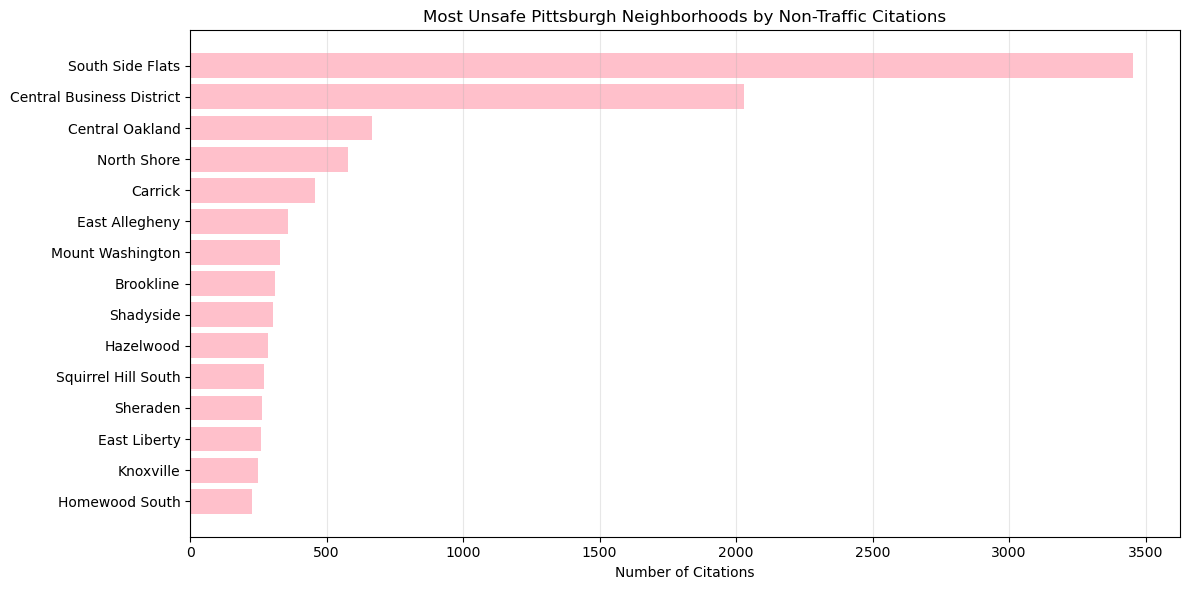

Top 15 Most Unsafe Neighborhoods:
1. South Side Flats: 3453 citations
2. Central Business District: 2027 citations
3. Central Oakland: 665 citations
4. North Shore: 577 citations
5. Carrick: 456 citations
6. East Allegheny: 360 citations
7. Mount Washington: 329 citations
8. Brookline: 310 citations
9. Shadyside: 304 citations
10. Hazelwood: 285 citations
11. Squirrel Hill South: 272 citations
12. Sheraden: 265 citations
13. East Liberty: 258 citations
14. Knoxville: 247 citations
15. Homewood South: 227 citations


In [19]:
# Filter out non-neighborhoods
non_neighborhoods = ['Outside County', 'Outside State', 'Unable To Retrieve Address', 'Outside City']
filtered_citations = citations_per_neighborhood[~citations_per_neighborhood['NEIGHBORHOOD'].isin(non_neighborhoods)]

# Get the top 15 most unsafe neighborhoods (highest citation counts)
top_15_unsafest = filtered_citations.nlargest(15, 'citation_count')

# Create the graph
plt.figure(figsize=(12, 6))
plt.barh(top_15_unsafest['NEIGHBORHOOD'], top_15_unsafest['citation_count'], color='pink')
plt.xlabel('Number of Citations')
plt.title('Most Unsafe Pittsburgh Neighborhoods by Non-Traffic Citations')
plt.gca().invert_yaxis()  # This puts the highest at the top
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Top 15 Most Unsafe Neighborhoods:")
for i, (idx, row) in enumerate(top_15_unsafest.iterrows(), 1):
    print(f"{i}. {row['NEIGHBORHOOD']}: {row['citation_count']} citations")

# Firearm Seizures
## Lakshya Srinivasan
I am measuring safety by calculating the number of firearms that have been seized by the Pittsburgh Police in each neighborhood. The safest neighborhood would have the smallest number of firearm seizures, while the neighborhood with the highest number of firearm seizures would be unsafe to live in.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_csv("/ihome/cmpinf0010_2025f/las660/Final-Project-Best-Pittsburgh-Neighborhood-/data/firearm_seizures.csv", index_col="_id")

In [4]:
data.head()

,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,,,,,,
1,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
2,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
3,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
4,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
5,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


In [5]:
data.columns

Index(['address', 'total_count', 'other_count', 'pistol_count',
       'revolver_count', 'rifle_count', 'shotgun_count', 'year', 'month',
       'dow', 'neighborhood', 'council_district', 'ward', 'tract',
       'public_works_division', 'police_zone', 'fire_zone', 'latitude',
       'longitude'],
      dtype='object')

In [6]:
cols = ["neighborhood", "total_count", "pistol_count", "revolver_count", "rifle_count", "shotgun_count"]

# Group by neighborhood and sum all counts
top20 = (data.dropna(subset=["neighborhood"]).groupby("neighborhood")[cols[1:]].sum().reset_index().sort_values(by="total_count", ascending=True).head(20))

top20

,neighborhood,total_count,pistol_count,revolver_count,rifle_count,shotgun_count
78,Summer Hill,3,2,0,0,1
79,Swisshelm Park,3,1,1,1,0
20,Chartiers City,4,3,1,0,0
57,Oakwood,4,2,1,0,1
53,Mt. Oliver,4,2,1,0,1
64,Regent Square,4,2,1,0,0
32,Friendship,5,4,1,0,0
84,West End,6,6,0,0,0
75,St. Clair,7,5,0,1,1
36,Hays,8,6,1,1,0


In [7]:
cols = ["neighborhood", "total_count", "pistol_count", "revolver_count", "rifle_count", "shotgun_count"]

# Group by neighborhood and sum all counts
low20 = (data.dropna(subset=["neighborhood"]).groupby("neighborhood")[cols[1:]].sum().reset_index().sort_values(by="total_count", ascending=False).head(20))

#show unsafe neighborhood
low20

,neighborhood,total_count,pistol_count,revolver_count,rifle_count,shotgun_count
40,Homewood South,345,257,43,25,15
69,South Side Flats,208,187,12,2,2
39,Homewood North,159,121,20,13,3
12,Brighton Heights,149,109,4,24,7
48,Marshall-Shadeland,148,109,10,13,13
15,Carrick,148,97,16,21,10
27,East Liberty,148,97,12,29,9
37,Hazelwood,144,105,14,16,7
26,East Hills,137,109,19,4,3
45,Lincoln-Lemington-Belmar,136,98,21,7,5


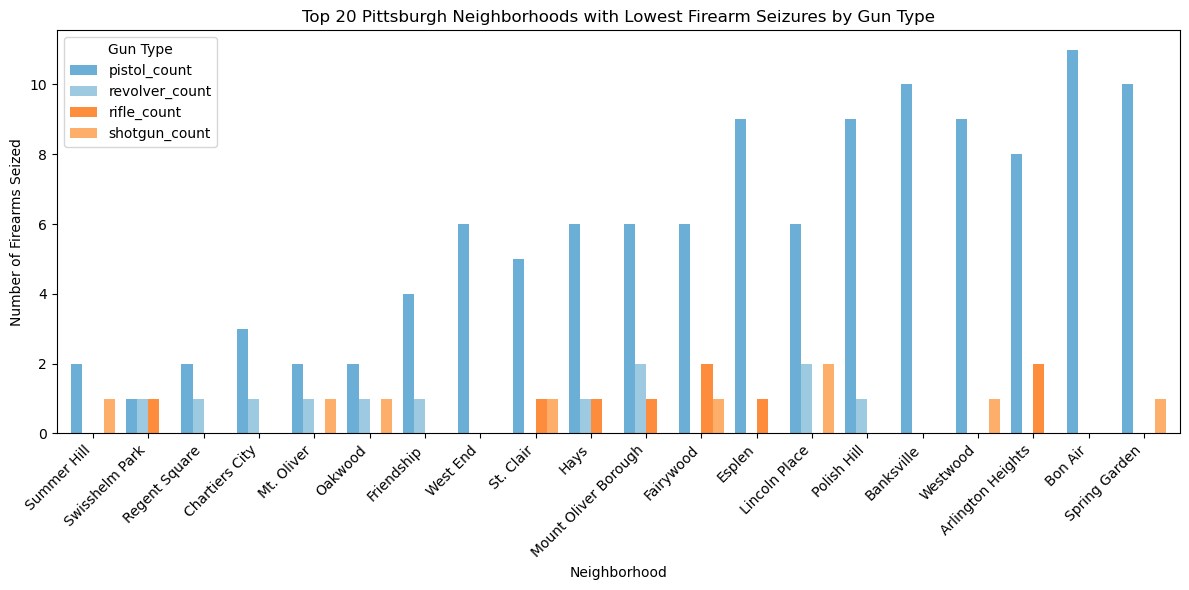

In [8]:
#filter columns only needed
cols = ["neighborhood", "pistol_count", "revolver_count", "rifle_count", "shotgun_count"]

#group firearms by neighborhood
gun_types_by_neighborhood = (data.dropna(subset=["neighborhood"]).groupby("neighborhood")[cols[1:]].sum().reset_index())

#get total firearm seizures per neighborhood
gun_types_by_neighborhood["total_count"] = gun_types_by_neighborhood[["pistol_count", "revolver_count", "rifle_count", "shotgun_count"]].sum(axis=1)

#sort total_count from least to greatest
lowest20 = gun_types_by_neighborhood.sort_values(by="total_count", ascending=True).head(20)

#making colors
color_map = ["#6baed6", "#9ecae1", "#fd8d3c", "#fdae6b"]

#customizing the bars and setting labels
lowest20.set_index("neighborhood")[["pistol_count", "revolver_count", "rifle_count", "shotgun_count"]].plot(kind="bar",figsize=(12,6),color=color_map,width=0.8)

#making chart
plt.title("Top 20 Pittsburgh Neighborhoods with Lowest Firearm Seizures by Gun Type")
plt.ylabel("Number of Firearms Seized")
plt.xlabel("Neighborhood")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Gun Type")
plt.tight_layout()
plt.show()

In [9]:
data["neighborhood"].unique()

city = data[data["neighborhood"].str.lower().str.strip() == "chartiers city"]

total = city.groupby("neighborhood")["total_count"].sum()

total

neighborhood
Chartiers City    4
Name: total_count, dtype: int64

## Conclusion
The Top 5 neighborhoods that are the safest are Summer Hill, Swisshelm Park, Regent Square, Chartiers City, and Mt. Oliver because they have the lowest amount of firearm seizures compared to other neighborhoods in Pittsburgh. The Top 5 neighborhoods that are the unsafest are Homewood South, Southside Flats, Homewood North, Brighton Heights, and Marshal-Shadeland. The most popular type of gun that was seized was a pistol.

## Monthly Criminal Activity
### AJ Mitchell

In this project I'm tasked with identifying and proving which is the "best" neighborhood in Pittsburgh using a data set that's collected from each neighborhood in Pittsburgh. I was originally going to use a metric that collected SNAP data from each neighborhood or a metric that reported landslide prone areas, but I ultimately chose a metric based on the monthly criminal activity in each neighborhood as my group and I decided to chose metrics based on safety.

In [1]:
import pandas as pd

crime = pd.read_csv("/ihome/cmpinf0010_2025f/ajm698/Final-Project-Best-Pittsburgh-Neighborhood-/data/Monthly_Criminal_Activity.csv", low_memory=False)
#cf = crime filter
cf = crime[["Neighborhood", "ReportedMonth", "NIBRS_Offense_Type"]]

#each neighborhood
neighborhoods = crime["Neighborhood"].unique()
neighborhoods_list = []

for neighborhood in neighborhoods:
    if isinstance(neighborhood, str):
        neighborhoods_list.append(neighborhood)

for neighborhood in neighborhoods_list:
    print(neighborhood)



Brookline
Manchester
Point Breeze North
South Side Flats
North Shore
Greenfield
Homewood North
South Side Slopes
Central Business District
East Liberty
North Oakland
Squirrel Hill South
East Allegheny
Strip District
Lincoln–Lemington–Belmar
Shadyside
Carrick
Point Breeze
Morningside
Allentown
Crafton Heights
Mount Washington
Crawford-Roberts
Marshall-Shadeland
Central Oakland
Elliott
Brighton Heights
Central Lawrenceville
Summer Hill
South Oakland
Homewood South
Knoxville
Terrace Village
West Oakland
Fineview
Perry South
Upper Lawrenceville
Bluff
Sheraden
Spring Hill–City View
Bloomfield
Beechview
Squirrel Hill North
Garfield
Banksville
Bon Air
Northview Heights
Overbrook
Larimer
Hazelwood
Friendship
Central Northside
Homewood West
Lower Lawrenceville
East Carnegie
Bedford Dwellings
Lincoln-Lemington-Belmar
New Homestead
Troy Hill
Highland Park
Lincoln Place
Chateau
Polish Hill
Glen Hazel
Hays
California-Kirkbride
East Hills
Middle Hill
Regent Square
Perry North
Stanton Heights
West En

In [2]:
#each offense type
offense_type = crime["NIBRS_Offense_Type"].unique()
offense_type_list = []

for offense in offense_type:
    if isinstance(offense, str):
        offense_type_list.append(offense)

offense_type_list.sort()

for offense in offense_type_list:
    print(offense)


Aggravated Assault
All Other Larceny
All other Offenses
Arson
Assisting or Promoting Prostitution
Bad Checks
Bribery
Burglary/Breaking & Entering
Commercial Sex Acts
Counterfeiting/Forgery
Credit Card/ATM Fraud
Curfew/Loiting/Vagrancy Violations
Destruction/Damage/Vandalism of Property
Disorderly Conduct
Driving Under the Influence
Drug Equipment Violations
Drug/Narcotic Violations
Drunkenness
Embezzlement
Extortion/Blackmail
False Pretenses/Swindle/Confidence Game
Family Offenses, Nonviolent
Forcible Fondling
Forcible Rape
Forcible Sodomy
Hacking/Computer Invasion
Impersonation
Incest
Intimidation
Involuntary Servitude
Kidnapping/Abduction
Liquor Law Violaitons
Motor Vehicle Theft
Murder & Nonnegligent Manslaughter
Negligent Manslaughter
Not NIBRS Reportable
Peeping Tom
Pocket-Picking
Pornography/Obscene Material
Prostitution
Purse-snatching
Robbery
Sexual Assault With An Object
Shoplifting
Simple Assault
Statutory Rape
Stolen Property Offenses
Theft from Building
Theft from Coin-oper

In [12]:
#total crimes each neighborhood has for each month
#avg crimes per month for each neighboorhood
#total crimes per month per neighborhood 
cf = cf.copy()

cf_monthly = cf.groupby(["Neighborhood", "ReportedMonth"])["NIBRS_Offense_Type"].count()
avg_monthly = cf_monthly.groupby("Neighborhood").mean()

cf_years = cf_monthly.groupby("Neighborhood").sum()

In [13]:
#neighborhoods_list = []
ndata = []

for neighborhood in neighborhoods_list:
    ndata.append({"Neighborhood": neighborhood, "Average_Crime_Per_Month": avg_monthly.loc[neighborhood], "Total_Crime_Years": cf_years.loc[neighborhood]})

data = pd.DataFrame(ndata)
data

,Neighborhood,Average_Crime_Per_Month,Total_Crime_Years
0,Brookline,108.166667,1298
1,Manchester,31.083333,373
2,Point Breeze North,40.666667,488
3,South Side Flats,385.166667,4622
4,North Shore,87.250000,1047
...,...,...,...
86,Fairywood,8.916667,107
87,Saint Clair,3.571429,25
88,Swisshelm Park,6.000000,66
89,Chartiers,3.166667,38


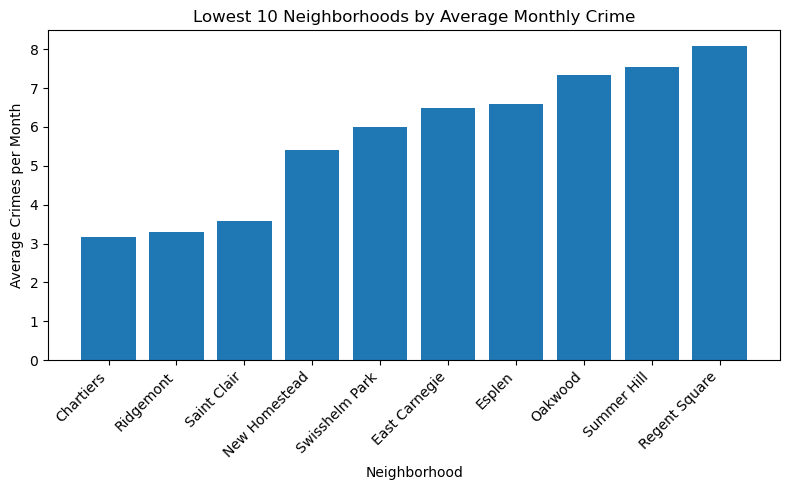

,Neighborhoods,Lowest5_Monthly_Avg
0,Chartiers,3.166667
1,Ridgemont,3.300000
2,Saint Clair,3.571429
3,New Homestead,5.400000
4,Swisshelm Park,6.000000


In [26]:
import matplotlib.pyplot as plt

lowest10_monthly = data.nsmallest(10, "Average_Crime_Per_Month")[["Neighborhood", "Average_Crime_Per_Month"]]

lowest10monthly = pd.DataFrame({
    "Neighborhoods": lowest10_monthly["Neighborhood"].values,
    "Lowest10_Monthly_Avg": lowest10_monthly["Average_Crime_Per_Month"].values
                          })

plt.figure(figsize=(8, 5))
plt.bar(lowest10monthly["Neighborhoods"], lowest10monthly["Lowest10_Monthly_Avg"])
plt.title("Lowest 10 Neighborhoods by Average Monthly Crime")
plt.xlabel("Neighborhood")
plt.ylabel("Average Crimes per Month")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

lowest5monthly.head()

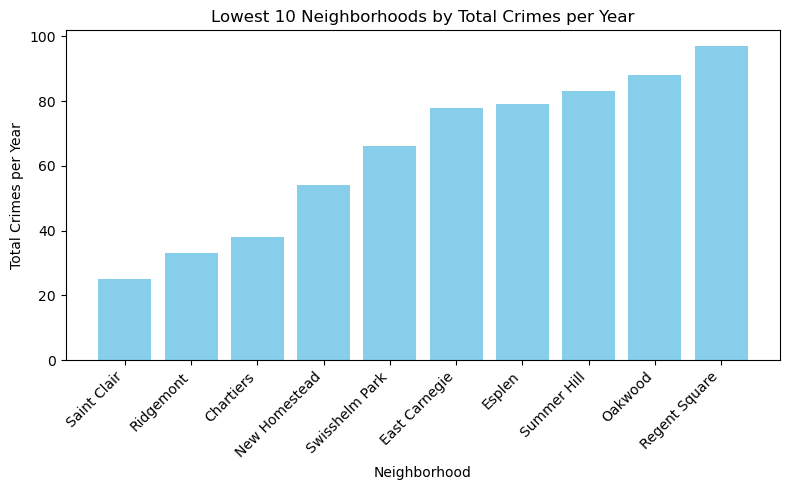

,Neighborhoods,Lowest10_Through_Years
0,Saint Clair,25
1,Ridgemont,33
2,Chartiers,38
3,New Homestead,54
4,Swisshelm Park,66


In [25]:
lowest10_yearly = data.nsmallest(10, "Total_Crime_Years")[["Neighborhood", "Total_Crime_Years"]]

lowest10year = pd.DataFrame({
    "Neighborhoods": lowest10_yearly["Neighborhood"].values,
    "Lowest10_Through_Years": lowest10_yearly["Total_Crime_Years"].values
                          })

plt.figure(figsize=(8, 5))
plt.bar(lowest10year["Neighborhoods"], lowest10year["Lowest10_Through_Years"], color="skyblue")
plt.title("Lowest 10 Neighborhoods by Total Crimes per Year")
plt.xlabel("Neighborhood")
plt.ylabel("Total Crimes per Year")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

lowest10year.head()